In [ ]:
#importing Dependencies
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

In [ ]:
#Loading the dataset
from google.colab import files
upload = files.upload()

Saving cancer dataset.csv to cancer dataset.csv


In [ ]:
data = pd.read_csv('cancer dataset.csv', sep = ';')
data.head()

,clump,ucellsize,ucellshape,mgadhesion,sepics,bnuclei,bchromatin,normnucl,mitoses,classe
0,4,1,1,1,2,3,1,1,1,begnin
1,1,5,8,6,5,8,7,10,1,malignant
2,3,2,2,3,2,1,1,1,1,begnin
3,3,1,1,3,8,1,5,8,1,begnin
4,10,4,6,1,2,10,5,3,1,malignant


In [ ]:
data.shape

(300, 10)

In [ ]:
data.isnull().sum()

clump         0
ucellsize     0
ucellshape    0
mgadhesion    0
sepics        0
bnuclei       0
bchromatin    0
normnucl      0
mitoses       0
classe        0
dtype: int64

In [ ]:
data.duplicated().sum()

88

In [ ]:
#we cant drop duplicated because there discret varialbe in the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   clump       300 non-null    int64 
 1   ucellsize   300 non-null    int64 
 2   ucellshape  300 non-null    int64 
 3   mgadhesion  300 non-null    int64 
 4   sepics      300 non-null    int64 
 5   bnuclei     300 non-null    int64 
 6   bchromatin  300 non-null    int64 
 7   normnucl    300 non-null    int64 
 8   mitoses     300 non-null    int64 
 9   classe      300 non-null    object
dtypes: int64(9), object(1)
memory usage: 23.6+ KB


In [ ]:
data.describe()

,clump,ucellsize,ucellshape,mgadhesion,sepics,bnuclei,bchromatin,normnucl,mitoses
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,4.436667,3.053333,3.216667,2.653333,3.236667,3.470000,3.360000,2.860000,1.616667
std,2.820017,2.997851,3.008859,2.710037,2.205342,3.561561,2.404789,3.114386,1.800146
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,3.000000,4.000000,5.000000,4.000000,3.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [ ]:
### Seperate the features and labels

features = ['clump', 'ucellsize', 'ucellshape', 'mgadhesion', 'sepics', 'bnuclei',
             'bchromatin', 'normnucl', 'mitoses']
y = data['classe']

In [ ]:
y.value_counts() 

begnin       199
malignant    101
Name: classe, dtype: int64

this is binary classification problem because the label has two classes

In [ ]:
#Selecting the best 3 features using Select Kbest

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

sk = SelectKBest(score_func=f_classif, k=3)

X_selected = sk.fit_transform(data[features].values, y.values)

In [ ]:
X_selected   

array([[ 1,  1,  3],
       [ 5,  8,  8],
       [ 2,  2,  1],
       [ 1,  1,  1],
       [ 4,  6, 10],
       [ 5,  7,  7],
       [ 3,  3,  2],
       [10, 10,  8],
       [ 5,  6,  8],
       [ 3,  2, 10],
       [ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  5,  4],
       [ 1,  1,  1],
       [ 3,  4,  5],
       [ 1,  1,  1],
       [ 3,  5,  3],
       [ 1,  1,  1],
       [ 1,  1,  1],
       [ 1,  1,  1],
       [ 1,  1,  1],
       [ 7, 10, 10],
       [ 1,  1,  1],
       [ 1,  1,  4],
       [ 1,  1,  1],
       [ 1,  2,  1],
       [ 1,  1,  1],
       [ 1,  1,  1],
       [ 6,  6, 10],
       [ 1,  1,  1],
       [ 5,  5, 10],
       [ 2,  3,  1],
       [ 1,  1,  1],
       [ 1,  1,  1],
       [ 1,  2,  1],
       [ 7,  4,  3],
       [ 5,  7, 10],
       [ 3,  4,  2],
       [ 1,  1,  1],
       [ 8,  8,  4],
       [ 3,  4, 10],
       [ 1,  1,  1],
       [ 3,  2,  3],
       [ 2,  4, 10],
       [ 1,  3,  1],
       [ 1,  1,  1],
       [10,  9,  5],
       [ 3,  

The three features selected by the feature selection model are UCELLSIZE, UCELLSHAPE and BNUCLEI

In [ ]:
X_selected.shape

(300, 3)

In [ ]:
# encode classe values as numeric values
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
Y = to_categorical(encoded_Y)

Y

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.

In [ ]:
#Spliting into train and test data
x_train, x_test, y_train, y_test = train_test_split(X_selected,Y, test_size = 0.2, random_state= 0)

#Spliting the training model into model and validation
x_model,x_val,y_model,y_val = train_test_split(x_train,y_train,test_size=0.2)

In [ ]:
## Defining the model

model = Sequential([
    Dense(27, input_dim=3, activation= 'relu'),   #This is indicating the hiddien layer with 16 nodes and the input has 4 nodes
    Dense(2, activation='sigmoid')])   

In [ ]:
#compiling  the model

model.compile(loss = 'binary_crossentropy', optimizer ='adam', metrics = ['accuracy'])  
# the reason for using a binary cross entropy is because the label has two class (binary classification)

history  = model.fit(x_model,y_model, validation_data=(x_val, y_val), epochs=70, batch_size = 20)  #training

Epoch 1/70
10/10 [==============================] - 1s 26ms/step - loss: 0.8972 - accuracy: 0.3542 - val_loss: 0.8635 - val_accuracy: 0.3958
Epoch 2/70
10/10 [==============================] - 0s 10ms/step - loss: 0.7988 - accuracy: 0.3438 - val_loss: 0.7762 - val_accuracy: 0.3333
Epoch 3/70
10/10 [==============================] - 0s 13ms/step - loss: 0.7266 - accuracy: 0.3385 - val_loss: 0.7130 - val_accuracy: 0.3333
Epoch 4/70
10/10 [==============================] - 0s 10ms/step - loss: 0.6828 - accuracy: 0.3385 - val_loss: 0.6731 - val_accuracy: 0.3333
Epoch 5/70
10/10 [==============================] - 0s 9ms/step - loss: 0.6550 - accuracy: 0.3385 - val_loss: 0.6508 - val_accuracy: 0.3333
Epoch 6/70
10/10 [==============================] - 0s 10ms/step - loss: 0.6409 - accuracy: 0.3438 - val_loss: 0.6351 - val_accuracy: 0.3333
Epoch 7/70
10/10 [==============================] - 0s 10ms/step - loss: 0.6288 - accuracy: 0.3490 - val_loss: 0.6232 - val_accuracy: 0.3542
Epoch 8/70
10/

In [ ]:
 model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 27)                108       
                                                                 
 dense_15 (Dense)            (None, 2)                 56        
                                                                 
Total params: 164
Trainable params: 164
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_pred = model.predict(x_test)

2/2 [==============================] - 0s 9ms/step


In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

pred = []

for i in range(len(y_pred)):
  pred.append(np.argmax(y_pred[i]))

test = []

for i in range(len(y_test)):
  test.append(np.argmax(y_test[i]))

print(f'The accuracy on test data is {accuracy_score(pred, test)}')

The accuracy on test data is 1.0


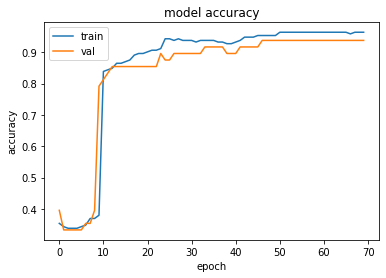

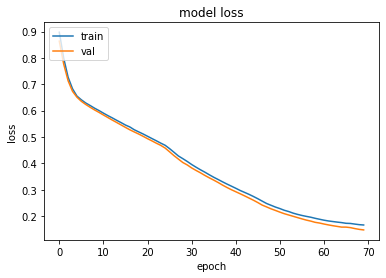

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

From the graph above representing the model loss, there is a no case of overfiting because at every epoch where the validation loss is decreasing the training loss is also decreasing 